<img src="../images/blackfin_logo_black.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge
# Notebook 4: Production Model and Insights

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# imports datasets
train = pd.read_csv('../datasets/train_cleaned.csv')
test = pd.read_csv('../datasets/test_cleaned.csv')
test_original = pd.read_csv('../datasets/test.csv')

In [3]:
# define X and y from train dataset
X = train.drop(columns = 'saleprice')
y = train['saleprice']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
sc = StandardScaler() # instantiate scaling
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Lasso Regression

In [6]:
# refit lasso on train dataset 
lasso = LassoCV()
lasso.fit(X_train_sc, y_train)

LassoCV()

In [7]:
lasso.score(X_train_sc, y_train)

0.9248563540810519

In [8]:
print(f'Number of Features before Lasso Regression:{len(X.columns)}')
print(f'Features Zeroed Out by Lasso regression:', len(lasso.coef_[lasso.coef_ == 0]))
print(f'Numnber of Features Remaining after Lasso Regression: {len(X.columns) - len(lasso.coef_[lasso.coef_ == 0])}')

Number of Features before Lasso Regression:193
Features Zeroed Out by Lasso regression: 73
Numnber of Features Remaining after Lasso Regression: 120


In [9]:
test_sc = sc.transform(test) # scale test data

In [10]:
lasso_pred = lasso.predict(test_sc) # predict sale prices based on test dataset

In [11]:
lasso_kaggle = pd.DataFrame() # create dataframe for kaggle submission

In [12]:
lasso_kaggle['Id'] = test_original['Id']

In [13]:
lasso_kaggle['SalePrice'] = lasso_pred

In [14]:
lasso_kaggle.to_csv('../datasets/kaggle_submissions/lasso_kaggle.csv', index = False)

### Ridge Regression

In [15]:
# refit ridge on train dataset
ridge = RidgeCV()
ridge.fit(X_train_sc, y_train)

RidgeCV()

In [16]:
ridge.score(X_train_sc, y_train)

0.9288449487158916

In [17]:
print(f'Number of Features before Ridge Regression:{len(X.columns)}')
print(f'Features Zeroed Out by Ridge regression:', len(ridge.coef_[ridge.coef_ == 0]))
print(f'Numnber of Features Remaining after Ridge Regression: {len(X.columns) - len(ridge.coef_[ridge.coef_ == 0])}')

Number of Features before Ridge Regression:193
Features Zeroed Out by Ridge regression: 0
Numnber of Features Remaining after Ridge Regression: 193


The above outcomes is expected as RidgeC regression shrinks its coefficients towards zero and not to exactly 0. 

In [18]:
ridge_pred = ridge.predict(test_sc) # predict sale prices based on test dataset

In [19]:
ridge_kaggle = pd.DataFrame() # create dataframe for kaggle submission

In [20]:
ridge_kaggle['Id'] = test_original['Id']

In [21]:
ridge_kaggle['SalePrice'] = ridge_pred

In [22]:
ridge_kaggle.to_csv('../datasets/kaggle_submissions/ridge_kaggle.csv', index = False)

## Conclusion

<img src="../images/kaggle_score.png">
The public score calcuates approximately 70% of the test data, while the private score, which is the final results is based on the other 30%. <br><br>

From the RMSE score above, Ridge has a slightly lower Public Score than Lasso. 
Looking at Private Score, Lasso scores better than Ridge. Hence, <b>Lasso regression</b> will be used to predict saleprices. 

Using Lasso Regression, we got an RMSE of of 22092, which is a huge improvement compared to the baseline RMSE score of 79853. The Lasso model also has a high training R<sup>2</sup> score of 0.9247 which means that it can account for up to 92.5% of variance in saleprice. 

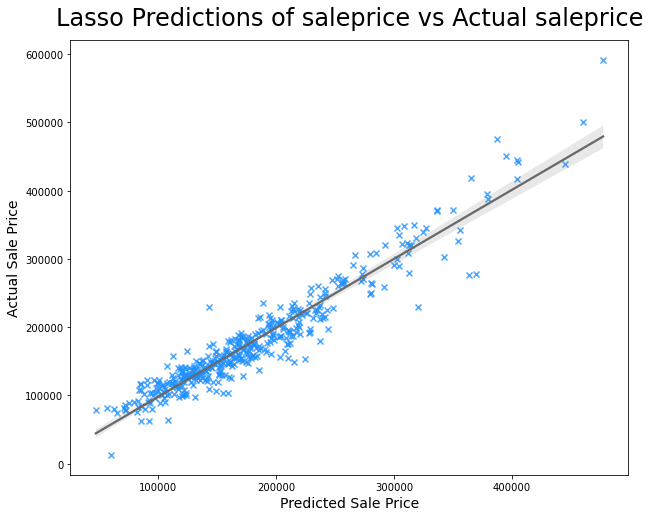

In [23]:
lasso_preds_test = lasso.predict(X_test_sc)

plt.figure(figsize = (10,8))
sns.regplot(x = lasso_preds_test, y = y_test, marker = 'x', color = 'dodgerblue', line_kws = {'color':'dimgrey'})
plt.xlabel('Predicted Sale Price', fontsize = 14)
plt.ylabel('Actual Sale Price', fontsize = 14)
plt.title('Lasso Predictions of saleprice vs Actual saleprice', fontsize = 24, y = 1.02);

From the graph above, we can observe that the best fit line passes through most of the points except for a few outliers towards the higher end of saleprices.

## Recommendation

1. We recommend using more recent data as the dataset given was saleprices between 2006 and 2010
2. Can refer to the heatmap below, to make decisions on feature selection and feature engineering
    - Total years lived in = year sold - year built
    - Total Interior square footage = TotalBsmtSF + GrLivArea + GarageArea
3. Identify and remove features with multicollinearity 
4. Take into account macroeconomic factors such as interest rates, inflation rates, GDP, unemployment rates

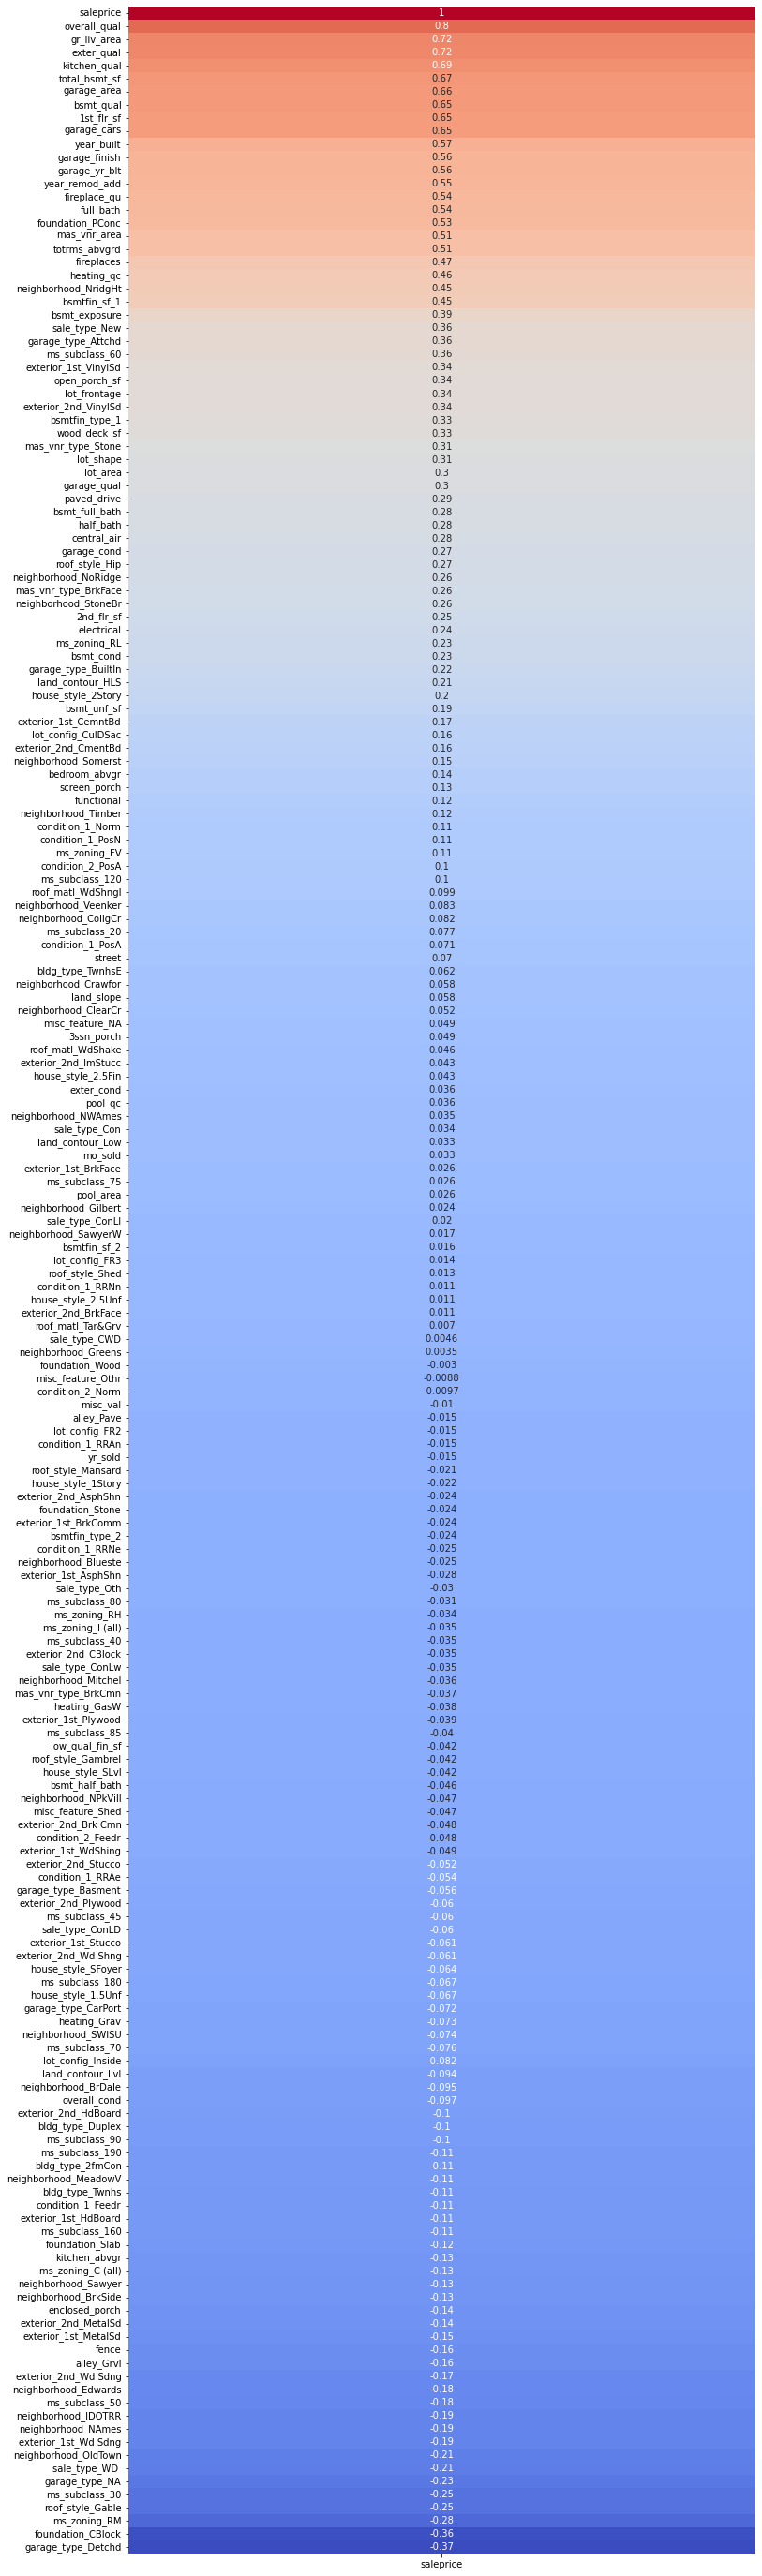

In [24]:
# Check correlation for all variables
plt.figure(figsize=(12,50))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), cmap='coolwarm', annot=True, cbar=False);